## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### K-means - Demo 3

* Comparação dos resultados de K-means e Mini Batch K-means

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [3]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


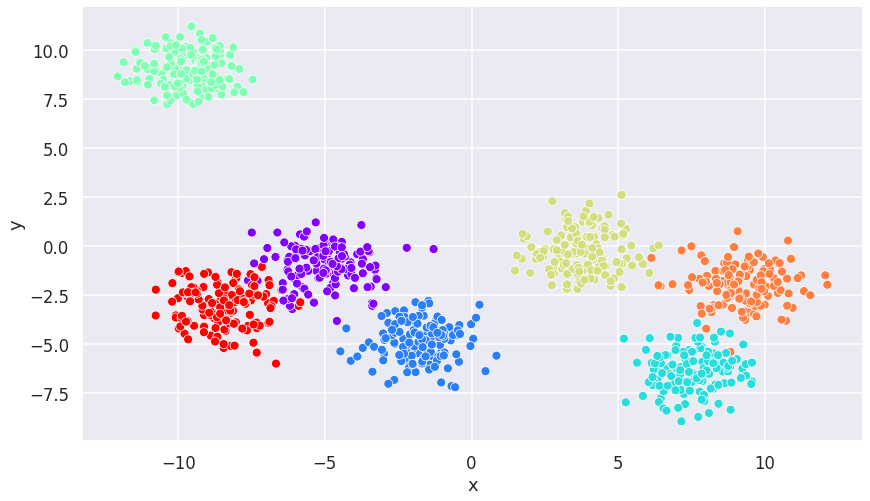

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### K-Means

In [5]:
def train_and_plot(data, k=3, method='default', verbose=0, random_state=133, plot=True):
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    if method ==  'minibatch':
        model = MiniBatchKMeans(n_clusters=k, random_state=random_state, verbose=verbose)
    else:
        model = KMeans(n_clusters=k, random_state=random_state, verbose=verbose)
        
    model.fit(data_copy)
    
    if plot:    
        data_copy['cluster_labels'] = model.labels_
        _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

        centroids = model.cluster_centers_
        centroids_x = centroids[:,0]
        centroids_y = centroids[:,1]

        _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    return model

Inércia: 1886.0331783506124
Tempo (s): 0.1726975440979004


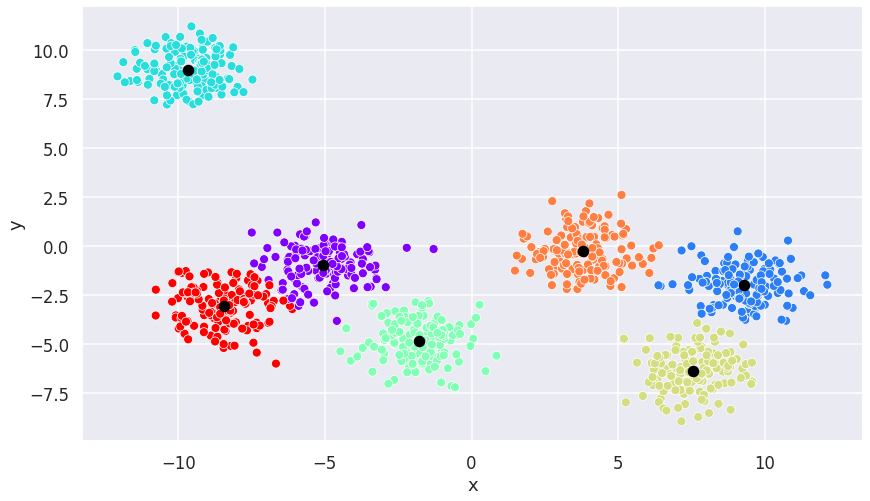

In [6]:
start = time.time()
clustering = train_and_plot(df, k=7)
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Mini Batch K-means

Inércia: 1890.9926463140866
Tempo (s): 0.09816718101501465


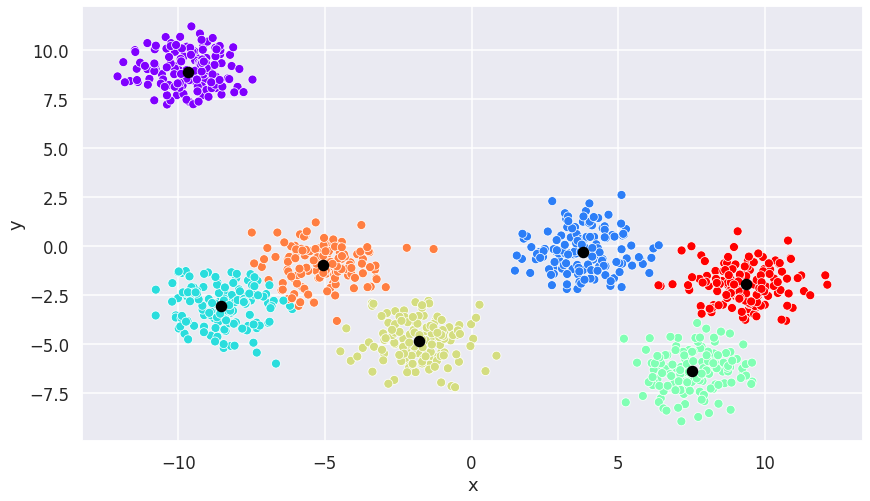

In [7]:
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Outras execuções
Execuções com resultados diferentes do K-means.

In [8]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


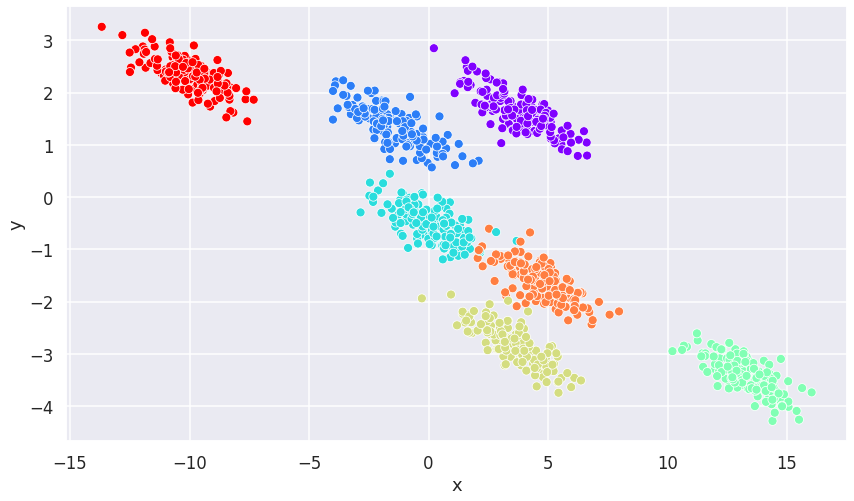

In [9]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

K-means
Inércia: 1240.0950569832025
Tempo (s): 0.14028406143188477


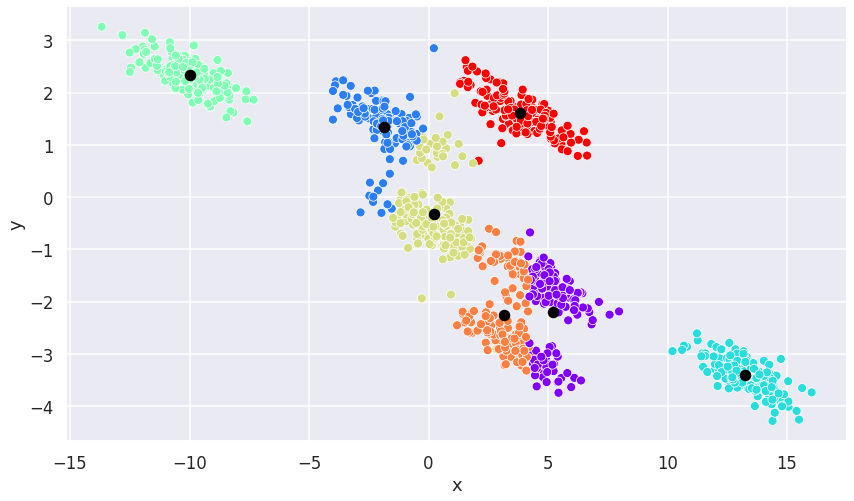

In [10]:
start = time.time()
clustering = train_and_plot(df_transformed, k=7)
print('K-means')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

Mini Batch k-means
Inércia: 1254.5392851275426
Tempo (s): 0.09626269340515137


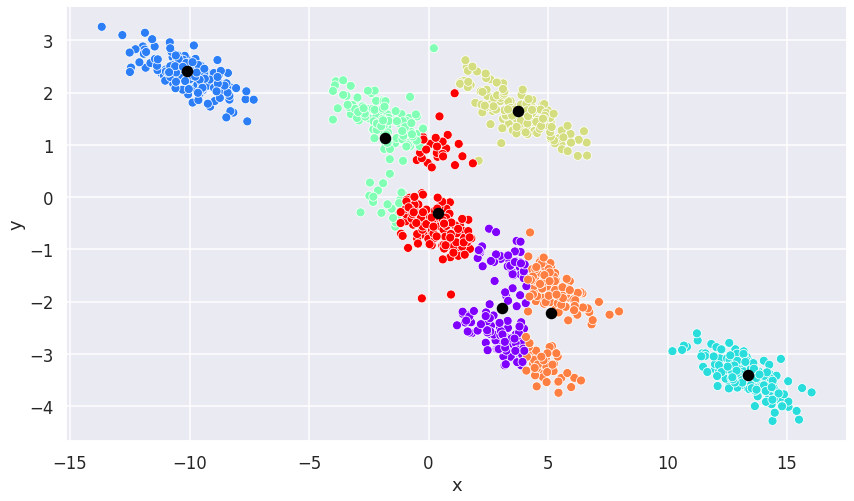

In [11]:
start = time.time()
clustering = train_and_plot(df_transformed, k=7, method='minibatch')
print('Mini Batch k-means')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Execução com base de dados de 1M de registros

In [12]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,-9.507284,7.336711,3
1,-5.079856,-2.823110,0
2,-2.155830,-5.106045,1
3,1.812118,-0.337578,4
4,8.453084,-5.795128,2


In [13]:
start = time.time()
clustering = train_and_plot(df, k=7, plot=False)
print('K-means')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

K-means
Inércia: 1963947.744801717
Tempo (s): 9.021329641342163


In [14]:
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch', plot=False)
print('Mini Batch k-means')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

Mini Batch k-means
Inércia: 1972242.952313568
Tempo (s): 2.889641046524048


### Execução com base de dados de 10M de registros

In [15]:
X, y = make_blobs(n_samples=10000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,5.374128,-5.825290,2
1,4.316808,1.193106,4
2,7.852112,-5.857027,2
3,-3.416934,-4.810063,1
4,4.635450,0.194526,4


In [16]:
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch', plot=False)
print('Mini Batch k-means')
print('Inércia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

Mini Batch k-means
Inércia: 19704455.88037695
Tempo (s): 31.45015549659729
